# Introduction
In 2018, researchers at the Instituto Universitário de Lisboa published a dataset detailing bookings at two hotels (City Hotel and Resort Hotel) in Portugal between July 2015 and August 2017. <br><br>
I would like to explore hotel booking trend in regards to:
1. How the average daily rates change throughout the year and whether this affects how many bookings are made
2. How far in advance guests like to make their reservations
3. Cancellation rates and when a guest is more likely to cancel a reservation

Dataset downloaded from Science Direct: https://www.sciencedirect.com/science/article/pii/S2352340918315191

# Import Packages

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Explore the Data

In [41]:
df = pd.read_csv('hotel_bookings.csv')
print(f"The dataset has {df.shape[1]} columns and {df.shape[0]} rows")
print("*****"*10)
print(df.info())

The dataset has 32 columns and 119390 rows
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-nul

### Description of Columns
|Column Name|Description|
| :--- | :--- |
| hotel| Hotel (H1 = Resort Hotel or H2 = City Hotel)|
| is_canceled| Value indicating if the booking was canceled (1) or not (0)|
| lead_time| Number of days that elapsed between the entering date of the booking into the PMS and the arrival date|
| arrival_date_year| Year of arrival date|
| arrival_date_month| Month of arrival date|
| arrival_date_week_number| Week number of year for arrival date|
| arrival_date_day_of_month| Day of arrival date|
| stays_in_weekend_nights| Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel|
| stays_in_week_nights| Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hote|
| adults| Number of adults|
| children| Number of children|
| babies| Number of babies|
| meal| Type of meal booked. Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner)|
| country| Country of origin. Categories are represented in the ISO 3155–3:2013 format|
| market_segment| Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”|
| distribution_channel| Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”|
| is_repeated_guest| Value indicating if the booking name was from a repeated guest (1) or not (0)|
| previous_cancellations| Number of previous bookings that were cancelled by the customer prior to the current booking|
| previous_bookings_not_cancelled| Number of previous bookings not cancelled by the customer prior to the current booking|
| reserved_room_type| Code of room type reserved. Code is presented instead of designation for anonymity reasons|
| assigned_room_type| Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons|
| booking_changes| Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation|
| deposit_type| Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay|
| agent| ID of the travel agency that made the booking|
| company| ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons|
| days_in_waiting_list| Number of days the booking was in the waiting list before it was confirmed to the customer|
| customer_type| Type of booking, assuming one of four categories: Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking|
| adr| Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights|
| required_car_parking_spaces| Number of car parking spaces required by the customer|
| total_of_special_requests| Number of special requests made by the customer (e.g. twin bed or high floor)|
| reservation_status| Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why|
| reservation_status_date| Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel|

In [42]:
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


I want to check which columns contain null values and how many null values there are in the dataset

In [43]:
print(f"There are {df.isna().values.sum()} null values")
print("*****"*10)
print(df.isnull().sum())

There are 129425 null values
**************************************************
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type      

There are some null values but not in the columns that I am interested in so I do not have to make any adjustments here.

Next, I want to look at columns with categorial variables to check that we don't have any strange values or misspellings

In [61]:
print(f"hotel: {sorted(df['hotel'].unique())}")
print("")
print(f"is_canceled: {sorted(df['is_canceled'].unique())}")
print("")
print(f"arrival_date_year: {sorted(df['arrival_date_year'].unique())}")
print("")
print(f"arrival_date_week_number: {sorted(df['arrival_date_week_number'].unique())}")
print("")
print(f"arrival_date_day_of_month: {sorted(df['arrival_date_day_of_month'].unique())}")
print("")
print(f"meal: {sorted(df['meal'].unique())}")
print("")
print(f"market_segment: {sorted(df['market_segment'].unique())}")
print("")
print(f"distribution_channel: {sorted(df['distribution_channel'].unique())}")
print("")
print(f"is_repeated_guest: {sorted(df['is_repeated_guest'].unique())}")
print("")
print(f"deposit_type: {sorted(df['deposit_type'].unique())}")

hotel: ['City Hotel', 'Resort Hotel']

is_canceled: [0, 1]

arrival_date_year: [2015, 2016, 2017]

arrival_date_week_number: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53]

arrival_date_day_of_month: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]

meal: ['BB', 'FB', 'HB', 'SC', 'Undefined']

market_segment: ['Aviation', 'Complementary', 'Corporate', 'Direct', 'Groups', 'Offline TA/TO', 'Online TA', 'Undefined']

distribution_channel: ['Corporate', 'Direct', 'GDS', 'TA/TO', 'Undefined']

is_repeated_guest: [0, 1]

deposit_type: ['No Deposit', 'Non Refund', 'Refundable']


The columns I am interested in are clean. Next I want to look at columns with continous values to check if there are any outliers or strange values

In [45]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


When looking at the stats on the columns, a few irregularities stand out to me:
1. A max lead time for 737 seems extremely large to me
2. The min ADR is -6. Why is there a negative number for a daily rate? The average daily rate of $5400 also seems extremely high
3. I will also want to check that stays_in_weekend_nights and stays_in_week_nights sum up to be greater than 0. There shouldn't be a booking with 0 nights

Boxplot of Lead Time Data
The upper IQR limit is 373.0
There are 3005 lead_time outliers
AxesSubplot(0.125,0.125;0.775x0.755)


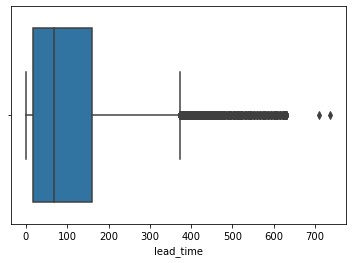

In [46]:
print('Boxplot of Lead Time Data')
Q1 = df.lead_time.quantile(0.25)
Q3 = df.lead_time.quantile(0.75)
IQR = Q3-Q1
print(f"The upper IQR limit is {Q3 + 1.5 * IQR}")
print(f"There are {df[(df.lead_time > (Q3 + 1.5 * IQR))].lead_time.count()} lead_time outliers")
print(sns.boxplot(df.lead_time))

It looks like there are 2 data points that are extreme outliers. I want to take a closer look at these to see if I need to exclude them

In [47]:
df[df.lead_time > 650]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
4182,Resort Hotel,0,709,2016,February,9,25,8,20,2,...,No Deposit,NaN,NaN,0,Transient,68.0,0,0,Check-Out,2016-03-24


Looking specifically at the row with the 737 days lead time, it looks like it also has 0 nights booked and an ADR of 0. I think this row should definitely be excluded. The row with 709 days lead time looks like a valid data point

Boxplot of Average Daily Rate Data
The upper IQR limit is 211.065
There are 3793 ADR outliers
There are 1960 ADR values either at or below 0 that will need to be removed for the analysis
I'm unsure whether an ADR of 0 means that the room was free or if it's an error so I will remove it to be safe
AxesSubplot(0.125,0.125;0.775x0.755)


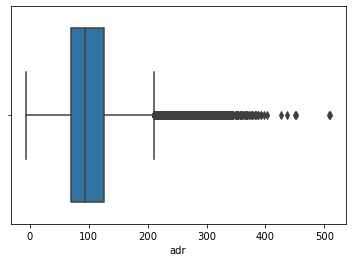

In [48]:
print('Boxplot of Average Daily Rate Data')
Q1 = df.adr.quantile(0.25)
Q3 = df.adr.quantile(0.75)
IQR = Q3-Q1
print(f"The upper IQR limit is {Q3 + 1.5 * IQR}")
print(f"There are {df[(df.adr > (Q3 + 1.5 * IQR))].adr.count()} ADR outliers")
print(f"There are {df[(df.adr <= 0)].adr.count()} ADR values either at or below 0 that will need to be removed for the analysis")
print("I'm unsure whether an ADR of 0 means that the room was free or if it's an error so I will remove it to be safe")
print(sns.boxplot(df[(df.adr < 5400)].adr)) # filtered because the 5400 adr was an extreme outlier and was messing with the boxplot visual

Again there are a few datapoints that look like extreme outliers. I'll take a look at these rows as well

In [49]:
df[df.adr > 410]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
13142,Resort Hotel,1,378,2017,August,31,1,4,10,2,...,No Deposit,314.0,NaN,0,Transient,450.00,0,0,Canceled,2016-07-22
13391,Resort Hotel,1,59,2017,August,33,13,2,4,2,...,No Deposit,250.0,NaN,0,Transient,437.00,0,0,Canceled,2017-08-03
15083,Resort Hotel,0,1,2015,July,29,15,0,1,2,...,No Deposit,NaN,NaN,0,Transient,508.00,1,0,Check-Out,2015-07-16
39155,Resort Hotel,0,31,2017,August,31,1,2,6,2,...,No Deposit,250.0,NaN,0,Transient,426.25,0,2,Check-Out,2017-08-09
48515,City Hotel,1,35,2016,March,13,25,0,1,2,...,Non Refund,12.0,NaN,0,Transient,5400.00,0,0,Canceled,2016-02-19
103912,City Hotel,0,81,2016,December,53,31,1,1,2,...,No Deposit,NaN,NaN,0,Transient-Party,451.50,0,4,Check-Out,2017-01-02
111403,City Hotel,0,0,2017,May,19,9,0,1,1,...,No Deposit,159.0,NaN,0,Transient,510.00,0,0,Check-Out,2017-05-10


Looking at the rest of the data for these outliers, it doesn't look like there's anything else strange about them so I will keep the data points

In [50]:
print("Looking at how many bookings have total_days_booked equal to 0 days")
df['total_days_booked'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
print(f"There are {df[(df.total_days_booked == 0)].total_days_booked.count()} total_days_booked = 0 that will need to be removed for the analysis")

Looking at how many bookings have total_days_booked equal to 0 days
There are 715 total_days_booked = 0 that will need to be removed for the analysis


# Manipulating the Data Using SQL
Aggregating and filtering the data for visualizing in Tableau
``` mysql
SELECT hotel, 
       arrival_date_year, 
       arrival_date_month, 
       arrival_date_day_of_month, 
       CASE WHEN is_canceled = 1 THEN 'True' ELSE 'False' 
           END AS is_canceled, 
       CASE WHEN is_repeated_guest = 1 THEN 'True' ELSE 'False' 
           END AS is_repeated_guest, 
       deposit_type, 
       SUM(stays_in_weekend_nights + stays_in_week_nights) AS total_nights_booked,
       AVG(stays_in_weekend_nights + stays_in_week_nights) AS avg_nights_booked,
       COUNT() AS num_bookings, 
       AVG(lead_time) AS avg_lead_time, 
           /*prefer to use median but SQLite doesn't include that function*/
       SUM(CASE WHEN lead_time BETWEEN 0 AND 30 THEN 1 ELSE 0 
           END) AS booked_1_month_ahead,
       SUM(CASE WHEN lead_time BETWEEN 31 AND 60 THEN 1 ELSE 0 
           END) AS booked_2_months_ahead,
       SUM(CASE WHEN lead_time BETWEEN 61 AND 90 THEN 1 ELSE 0 
           END) AS booked_3_months_ahead,
       SUM(CASE WHEN lead_time BETWEEN 91 AND 120 THEN 1 ELSE 0 
           END) AS booked_4_months_ahead,
       SUM(CASE WHEN lead_time BETWEEN 121 AND 150 THEN 1 ELSE 0 
           END) AS booked_5_months_ahead,
       SUM(CASE WHEN lead_time > 150 THEN 1 ELSE 0 
           END) AS booked_6plus_months_ahead,
       AVG(adr) AS avg_daily_rate, 
           /*prefer to use median but SQLite doesn't include that function*/
       SUM((stays_in_weekend_nights + stays_in_week_nights) * adr) AS total_revenue
FROM   hotel_bookings 
WHERE  lead_time < 737 
       AND adr > 0 
       AND (stays_in_weekend_nights + stays_in_week_nights) > 0 
GROUP  BY 1,2,3,4,5,6 
```

# Tableau Visualizations and Analysis

## Average Daily Rate
First I want to compare the average daily rates between city hotels and resort hotels. I'm interested to see the range and which dates are the most expensive

In [51]:
%%html
<div class='tableauPlaceholder' id='viz1610418209024' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ho&#47;HotelBookings_16099680989080&#47;AverageDailyRatebyDayDash&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='HotelBookings_16099680989080&#47;AverageDailyRatebyDayDash' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ho&#47;HotelBookings_16099680989080&#47;AverageDailyRatebyDayDash&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1610418209024');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else { vizElement.style.width='100%';vizElement.style.height='727px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [52]:
%%html
<div class='tableauPlaceholder' id='viz1610158413948' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ho&#47;HotelBookings_16099680989080&#47;AverageDailyRateDash&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='HotelBookings_16099680989080&#47;AverageDailyRateDash' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ho&#47;HotelBookings_16099680989080&#47;AverageDailyRateDash&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1610158413948');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else { vizElement.style.width='100%';vizElement.style.height='727px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

For both city hotels and resort hotels, the  higher daily rates tend to surround the summer months. However the city hotels have a more even spread over a longer period of time while the resort hotels spike heavily during the months of July and August. Overall, the city hotels have a higher average daily rate throughout the year since the difference in rates between the seasons isn't as drastic as it is for resort hotels. <br><br>
Next I want to see how the average daily rate correlates with the number of reservations.

In [53]:
%%html
<div class='tableauPlaceholder' id='viz1610158838695' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ho&#47;HotelBookings_16099680989080&#47;BookingsvsDailyRate&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='HotelBookings_16099680989080&#47;BookingsvsDailyRate' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ho&#47;HotelBookings_16099680989080&#47;BookingsvsDailyRate&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1610158838695');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

It's interesting to see the difference between city hotels and resort hotels. For city hotels, the number of reservations seems to increase in conjuction with the increase in daily rate. However for resort hotels, as the daily rate increase, the number of reservations decreases. I wonder if this difference is because city hotels are more commonly booked for necessary trips, such as business trips, so as demand increases, the price can increase as well. Whereas resort hotels are booked for leisure, and thus individuals are more conscientious of how much money they're spending. Before seeing this data, I assumed that the summer months of June-August would have been more popular for resort hotels due to summer holiday breaks. However the high prices during these months may be stopping a lot of people from booking the resorts. It may be worth testing whether lower prices will bring more customers to the resorts during the summer. <br><br>
Below is a scatter plot as another way to view the correlation between number of bookings and average daily rate. Again we see that for city hotels, as the average daily rate increase, the number of bookings increases as well. However for resorts, the increase isn't as strong.

In [54]:
%%html
<div class='tableauPlaceholder' id='viz1610159820517' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ho&#47;HotelBookings_16099680989080&#47;BookingsvsDailyRateScatter&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='HotelBookings_16099680989080&#47;BookingsvsDailyRateScatter' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ho&#47;HotelBookings_16099680989080&#47;BookingsvsDailyRateScatter&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1610159820517');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

## Lead Times
Next I want to take a look at lead times (the number of days that elapsed between the entering date of the booking into the PMS and the arrival date). I'm curious to see how lead times differ between city hotels and resort hotels

In [55]:
%%html
<div class='tableauPlaceholder' id='viz1610161292216' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ho&#47;HotelBookings_16099680989080&#47;BookingsvsLeadTimes&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='HotelBookings_16099680989080&#47;BookingsvsLeadTimes' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ho&#47;HotelBookings_16099680989080&#47;BookingsvsLeadTimes&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1610161292216');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

For city hotels, the number of bookings and lead time tend to follow the same trend. However for resorts, customers tend to make the reservations much further in advance for the summer months, regardless of how many total bookings there are. This trend for resorts could be due to the fact that customers are more certain of their summer plans so they are more likely to plan in advance. Those staying in city hotels for business trips, on the other hand, may want to book as late as possible in case their business plans change. Price may not be as large of a barrier for business trips as it is for leisure trips.<br><br>
Next I would like to see how the lead times correlate with average daily rates

In [56]:
%%html
<div class='tableauPlaceholder' id='viz1610161888909' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ho&#47;HotelBookings_16099680989080&#47;LeadTimesvsDailyRate&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='HotelBookings_16099680989080&#47;LeadTimesvsDailyRate' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ho&#47;HotelBookings_16099680989080&#47;LeadTimesvsDailyRate&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1610161888909');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

For both city hotels and resort hotels, the average daily rate seems to be higher the further out you reserve the room. The group of resort reservations that are over $140 per night are mostly July and August reservations, when the rate is generally always higher. I'm speculating that lower prices closer to the reservation date are due to hotels giving discounts in an attempt to sell out any remaining rooms.<br><br>
Although repeat guests only make up about 2% of city hotel reservations and 4% resort hotel reservations, I'm curious to see if they have different booking habits in regards to lead times

In [57]:
%%html
<div class='tableauPlaceholder' id='viz1610162155508' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ho&#47;HotelBookings_16099680989080&#47;RepeatedGuestLeadTime&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='HotelBookings_16099680989080&#47;RepeatedGuestLeadTime' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ho&#47;HotelBookings_16099680989080&#47;RepeatedGuestLeadTime&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1610162155508');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

For new guests, the number of reservations made gradually increases as the reservation date gets closer. However for repeat guests, a majority of the reservations are made within the 1 month leading up to the stay. Again, I wonder if hotels send out emails and promotions to past guests in a last-ditch effort to fill up any empty rooms.

## Cancellations
Finally I would like to look at cancellation habits to see which types of bookings are more likely to be cancelled.

In [58]:
%%html
<div class='tableauPlaceholder' id='viz1610225401541' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ho&#47;HotelBookings_16099680989080&#47;CancellationDash&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='HotelBookings_16099680989080&#47;CancellationDash' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ho&#47;HotelBookings_16099680989080&#47;CancellationDash&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1610225401541');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else { vizElement.style.width='100%';vizElement.style.height='727px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

Repeat guests have a much lower rate of cancellation. Around 16% of repeat guest bookings are cancelled, while around 37% of bookings made by new guests are cancelled. This may be because repeat guests already know what the hotel is like and thus only book again because they know they like that hotel. <br><br>
For new guests, bookings made closer to the reservation date are less likely to be cancelled than those made many months in advance. Guests are probably more certain about their plans the closer it gets to date and thus have less of a need to cancel. Repeat guests don't follow the same trend, but they make up such a small percentage of total bookings that their numbers don't really change the overall cancellation rate.<br><br>
We saw earlier that the average daily rates are lower the closer the reservation is made to the actual stay and higher the further out the reservation is made. If bookings made closer to the actual date of stay (& when prices are more likely to be low) are less likely to be cancelled, I wonder if the price of the room affects cancellations.

In [59]:
%%html
<div class='tableauPlaceholder' id='viz1610226028359' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ho&#47;HotelBookings_16099680989080&#47;CancellationvsAverageDailyRate&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='HotelBookings_16099680989080&#47;CancellationvsAverageDailyRate' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ho&#47;HotelBookings_16099680989080&#47;CancellationvsAverageDailyRate&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1610226028359');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

The average daily rates are similar for both cancelled and non-cancelled, especially for city hotels. Thus people aren't cancelling the reservations soley because of the price.

# Conclusion and Take-Aways
### Average Daily Rates
The average daily rate follows different trends between city hotels and resorts. It seems for city hotels, the average daily rate follows the laws of supply and demand. So as the number of bookings for these hotels went up, the average daily rate also went up. For resorts, the highest average daily rates were in the summer, but the summer months also saw the lowest number of bookings. City hotels may have more flexibility to increase their prices because of business trips that may need to book the hotels out of necessity. Guests who are looking to book resorts for leisure may be more price conscious. Although resorts are still making more revenue in the summer due to the just how high the daily rates are, it may be worth testing to see whether a slightly lower daily rate will bring in more customers. There may be a better sweet spot of average daily rate x number of bookings that could potentially increase total revenue.

### Lead Times
For city hotels, as the number of bookings goes up, the lead time also increases. However for resorts, customers tend to make the reservations much further in advance for the summer months, even though these months have the lowest number of bookings. Again this may be attributed to the differences between types of customers. Guests who are booking for the summer may already know what their summer break plans and schedule will be. However, guests booking city hotels for business trips do not know what their schedules are like so far out. Resorts will need to focus on advertising in the winter in order to attract more business for the summer, when the rates are higher.<br>

The average daily rate is higher the further in advance you reserve the room. Guests looking for the best discounts will want to wait to book. However hotels need to advertise further out to lock in reservations at the higher rates. Hotels lower the price the closer it gets to the reservation date as an attempt to fill any remaining rooms. We see that a majority of reservations by repeat guests are made within the 1 month leading up the actual stay. This may be due to hotels sending out emails and promotions to past guests as a last attempt to fill up available rooms.

### Cancellations
The closer the reservation is made to the actual date of stay, the less likely it is to be cancelled. This is especially true of new guests. Thus there is a bit of a conundrum. If a hotel wants to fill up its rooms at the higher rates, they will need to advertise much further in advance. However guests who do book further out at these higher rates are more likely to cancel their reservations. In the end, hotels are then stuck with a now available room and will need to sell it at a lower rate. We saw that the price of the room was about the same for cancelled and non-cancelled reservations. So it seems that the price is not the driver of the cancellation - the cancellation has more to do with when the reservation was made. Can hotels test whether maintaining higher room rates until just a month or 2 out can still attract the same number of bookings and fewer cancellations at the higher rates?